# Imports

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns

# Loading data.

In [2]:
MOVIE_DIRECTOR_FILE = 'movie-director.csv'
MOVIE_REVENUE_FILE  = 'movies-revenue.csv'
MOVIE_ACTOR_FILE    = 'movie-voice-actors.csv'

# Loading 

In [3]:
DATA_DIR = r'phase1'

In [4]:
from loading_data import load_regression_data

TRAIN_MOVIE_DIRECTOR_FILE = 'movie-director.csv'
TRAIN_MOVIE_REVENUE_FILE  = 'movies-revenue.csv'
TRAIN_MOVIE_ACTOR_FILE    = 'movie-voice-actors.csv'


DATA_MOVIE_DIRECTOR_FILE = os.path.join(DATA_DIR, TRAIN_MOVIE_DIRECTOR_FILE)
DATA_MOVIE_REVENUE_FILE  = os.path.join(DATA_DIR, TRAIN_MOVIE_REVENUE_FILE)
DATA_MOVIE_ACTOR_FILE    = os.path.join(DATA_DIR, TRAIN_MOVIE_ACTOR_FILE)

data = load_regression_data(director_file=DATA_MOVIE_DIRECTOR_FILE,
                                  actor_file=DATA_MOVIE_ACTOR_FILE,
                                  revenue_file=DATA_MOVIE_REVENUE_FILE)


# Preprocessing
* Handling `Genre` with Mode and OneHotEncoder
* Handling `MPAA` with mode
* Handling `Date` with Linear Regression
* Handling `Director` with dropping its column
* Handling `Title` & `Character` with label encoding
* Handling `MoviesSuccessLevel` with linear regression

In [5]:
from preprocessing import Preprocessor

## Data

<AxesSubplot:>

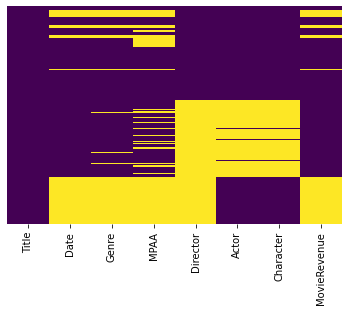

In [6]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
data.head()

,Title,Date,Genre,MPAA,Director,Actor,Character,MovieRevenue
0,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Scotty Mattraw,Bashful,"$5,228,953,251"
1,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Roy Atwell,Doc,"$5,228,953,251"
2,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Eddie Collins,Dopey,"$5,228,953,251"
3,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Pinto Colvig,Grumpy,"$5,228,953,251"
4,Snow White and the Seven Dwarfs,21-Dec-37,Musical,G,David Hand,Otis Harlan,Happy,"$5,228,953,251"


In [8]:
pp = Preprocessor()
data = pp.preprocess_regression(data)

<AxesSubplot:>

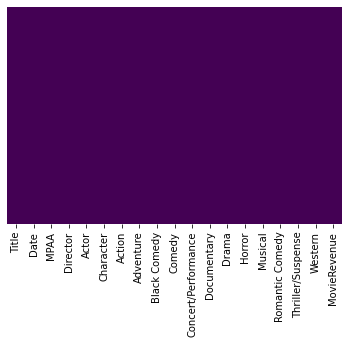

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
data.head()

,Title,Date,MPAA,Director,Actor,Character,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,MovieRevenue
0,351,2144966400.0,0,0,493,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.228953e+09
1,351,2144966400.0,0,0,477,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.228953e+09
2,351,2144966400.0,0,0,151,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.228953e+09
3,351,2144966400.0,0,0,436,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.228953e+09
4,351,2144966400.0,0,0,404,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.228953e+09


## Splitting

In [11]:
train_data = data.sample(frac=0.8, random_state=200)
test_data  = data.drop(train_data.index)

In [12]:
print(f'Train size: {train_data.shape}')
print(f'Test size: {test_data.shape}')

Train size: (1000, 19)
Test size: (250, 19)


# Building the model (model 1)

In [13]:
from regressors import LinearRegressionModel

In [14]:
lr = LinearRegressionModel(train_data)
lr.train()
lr.predict(test_data)
print(f"MSE: {lr.mean_squared_error()}")

MSE: 1.832930314671391e+17


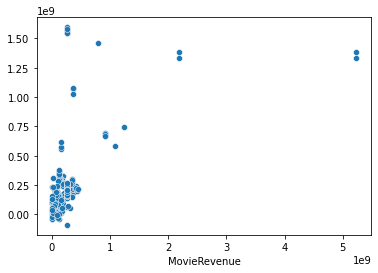

In [15]:
lr.scatterplot()

# Building the model (model 2)

## Dropping the the correlated indep columns

<AxesSubplot:>

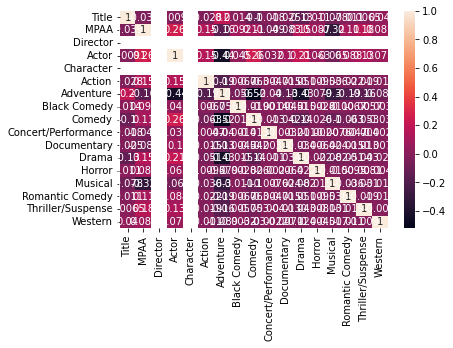

In [16]:
corr = train_data.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True)

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(train_data.iloc[:, :-1].corr(), 0.7)

In [19]:
f"Correlated Columns: {corr_features}"

'Correlated Columns: set()'

In [20]:
train_data_low_corr = train_data.drop(corr_features, axis=1)
test_data_low_corr = test_data.drop(corr_features, axis=1)

In [21]:
train_data.head()

,Title,Date,MPAA,Director,Actor,Character,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,MovieRevenue
525,547,1457049600.0,2,0,277,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.412682e+08
1085,112,1083667604.278158,2,0,525,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.563076e+08
812,172,864950400.0,2,0,565,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.626538e+07
1236,290,1170377191.526437,2,0,306,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.563076e+08
213,396,491011200.0,2,0,280,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.055314e+07


In [22]:
test_data.head()

,Title,Date,MPAA,Director,Actor,Character,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western,MovieRevenue
0,351,2144966400.0,0,0,493,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.228953e+09
10,351,2144966400.0,0,0,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.228953e+09
15,145,2236377600.0,0,0,537,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.187091e+09
17,145,2236377600.0,0,0,104,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.187091e+09
18,131,1152164218.862415,2,0,352,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.563076e+08


## Polynomial Regression

In [23]:
from regressors import PolyRegModel

In [24]:
pr = PolyRegModel(train_data_low_corr)
pr.train()
pr.predict(test_data_low_corr)
f"MSE: {pr.mean_squared_error()}"

'MSE: 1.017605376326787e+17'

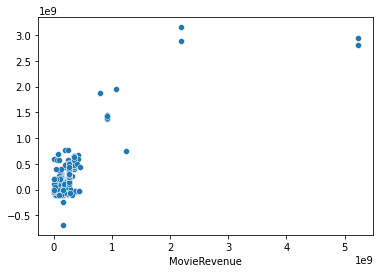

In [25]:
pr.scatterplot()

# Final Result

In [26]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

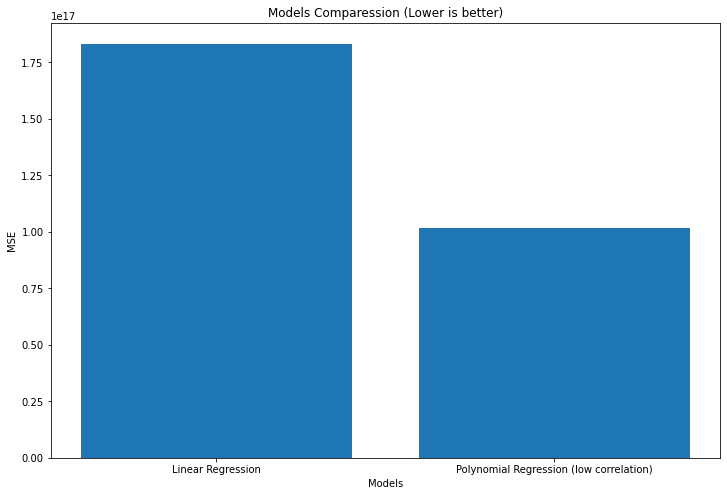

In [27]:
fig = plt.figure(figsize=(12, 8))
plt.title("Models Comparession (Lower is better)")
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(np.arange(2), ['Linear Regression', 'Polynomial Regression (low correlation)'])
plt.bar(np.arange(2), [lr.mean_squared_error(), pr.mean_squared_error()])